# Основная задача по прогнозированию европейской цены на метанола на основе выявлении зависимости от цены сырья (природного газа) и возможного влияния на цены на других базисах

Для работы используется файл эксель ID на листах которого собрана информация по ценам на природный газ и метанол,
а именно
* retro_gas - динамика цен на газ в хабе Генри
* Price_europe - динамика цена на спотовом хабе TTF нидерланды и котировка метанола в Амстердаме
* Mx_Monthly - динамика контрактных цен на метанол на разных базисах по месяцам
* Gas_forecast - динамика цен на газ на разных базисах
* forecast - прогноз цен на газ на хабе Генри (можно для проверки модели retro_gas)

Основные задачи:
* делаем корреляцию цен между:
 ценами на газ на разных базисах (если есть влияние - будем учитывать это в модели)
 контрактными ценами на метанол на разных базисах (аналогично)
* строим тренд стоимости газа на хабе Генри, смотрим как он соотносится с прогнозом Агентства энергетики США (профет)
* делаем корреляцию цен между ценами на метанол и газом в Амстердаме
* строим бустинг:
* цены на природный газ Gas_forecast
* цены на метанол Price_europe


In [33]:
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
#file = 'ID_2.xlsx'

# Загружаем spreadsheet в объект pandas
#xl = pd.ExcelFile(file)

# Печатаем название листов в данном файле
#print(xl.sheet_names)

# Загрузить лист в DataFrame по его имени: df1
#retro_gas = xl.parse('retro_gas')
#Mx_Monthly = xl.parse('Mx_Monthly')
#Price_europa = xl.parse('Price_europa')
#Gaz_basis = xl.parse('Gaz_basis')
#forecast = xl.parse('forecast')

In [35]:
#retro_gas

In [36]:
#Mx_Monthly

In [37]:
#print(Price_europa.astype)

In [38]:
#Gaz_basis

In [39]:
#forecast

Долго чистить - в целях экономии времени и сил, приведем исходные эксель к нормальному формату и импортируем

In [40]:
file = 'ID_1.xlsx'

#Загружаем spreadsheet в объект pandas
xl = pd.ExcelFile(file)

#Печатаем название листов в данном файле
print(xl.sheet_names)

#Загрузить лист в DataFrame по его имени: df1
retro_gas = xl.parse('retro_gas')
Mx_Monthly = xl.parse('Mx_Monthly')
Price_europa = xl.parse('Price_europa')
Gas_basis = xl.parse('Gas_basis')
forecast = xl.parse('forecast')

['Mx_Monthly', 'retro_gas', 'Price_europa', 'Gas_basis', 'forecast']


In [41]:
from IPython.display import display
data_list = [retro_gas, Mx_Monthly, Price_europa, Gas_basis, forecast]
for data in data_list:
    display(data)
    display(data.dtypes)

,Date,Henry Hub Natural Gas Spot Price (Dollars per Million Btu)
0,1997-01-15,3.45
1,1997-02-15,2.15
2,1997-03-15,1.89
3,1997-04-15,2.03
4,1997-05-15,2.25
...,...,...
294,2021-07-15,3.84
295,2021-08-15,4.07
296,2021-09-15,5.16
297,2021-10-15,5.51


Date                                                          datetime64[ns]
Henry Hub Natural Gas Spot Price (Dollars per Million Btu)           float64
dtype: object

,Date,US $/MT,Europe €/MT,Asia $/MT,China $/MT
0,2001-01-01,0.000,0.0,0,0
1,2001-02-01,0.000,0.0,0,0
2,2001-03-01,0.000,0.0,0,0
3,2001-04-01,0.000,0.0,0,0
4,2001-05-01,256.102,0.0,0,0
...,...,...,...,...,...
255,2022-04-01,659.000,570.0,540,500
256,2022-05-01,639.000,570.0,520,470
257,2022-06-01,615.000,570.0,480,430
258,2022-07-01,605.000,555.0,450,410


Date             datetime64[ns]
 US $/MT                float64
 Europe €/MT            float64
Asia $/MT                 int64
China $/MT                int64
dtype: object

,Ед.изм.,евро/тыс.м3,евро/тонна
0,2015-01-01,207.585,354
1,2015-02-01,234.675,339
2,2015-03-01,229.110,339
3,2015-04-01,231.210,365
4,2015-05-01,215.775,365
...,...,...,...
78,2021-07-01,378.945,410
79,2021-08-01,460.215,410
80,2021-09-01,656.460,410
81,2021-10-01,939.960,490


Ед.изм.        datetime64[ns]
евро/тыс.м3           float64
евро/тонна              int64
dtype: object

,year,Average German Import price,UK,Netherlands(DA Heren Index),US Henry Hub,цена на газ в РФ
0,1984,3.995635,0.000000,0.000000,0.000000,0.000000
1,1985,4.253587,0.000000,0.000000,0.000000,0.000000
2,1986,3.928619,0.000000,0.000000,0.000000,0.000000
3,1987,2.547503,0.000000,0.000000,0.000000,0.000000
4,1988,2.220359,0.000000,0.000000,0.000000,0.000000
5,1989,2.000514,0.000000,0.000000,1.696667,0.000000
6,1990,2.775893,0.000000,0.000000,1.638333,0.000000
7,1991,3.233289,0.000000,0.000000,1.486667,0.000000
8,1992,2.698698,0.000000,0.000000,1.771667,0.000000
9,1993,2.511376,0.000000,0.000000,2.120833,0.000000


year                             int64
Average German Import price    float64
UK                             float64
Netherlands(DA Heren Index)    float64
US Henry Hub                   float64
цена на газ в РФ               float64
dtype: object

,year,"price, nom $/MMBTu"
0,2050,7.213103
1,2049,6.931768
2,2048,6.633380
3,2047,6.367115
4,2046,6.154725
5,2045,5.976249
6,2044,5.822867
7,2043,5.693280
8,2042,5.602274
9,2041,5.513302


year                    int64
price, nom $/MMBTu    float64
dtype: object

видим, что для Gas_basis и forecast тип колонки для даты надо менять

In [42]:
Gas_basis['year'] = pd.to_datetime(Gas_basis['year'], format="%Y")
Gas_basis

,year,Average German Import price,UK,Netherlands(DA Heren Index),US Henry Hub,цена на газ в РФ
0,1984-01-01,3.995635,0.000000,0.000000,0.000000,0.000000
1,1985-01-01,4.253587,0.000000,0.000000,0.000000,0.000000
2,1986-01-01,3.928619,0.000000,0.000000,0.000000,0.000000
3,1987-01-01,2.547503,0.000000,0.000000,0.000000,0.000000
4,1988-01-01,2.220359,0.000000,0.000000,0.000000,0.000000
5,1989-01-01,2.000514,0.000000,0.000000,1.696667,0.000000
6,1990-01-01,2.775893,0.000000,0.000000,1.638333,0.000000
7,1991-01-01,3.233289,0.000000,0.000000,1.486667,0.000000
8,1992-01-01,2.698698,0.000000,0.000000,1.771667,0.000000
9,1993-01-01,2.511376,0.000000,0.000000,2.120833,0.000000


In [43]:
forecast['year'] = pd.to_datetime(forecast['year'], format="%Y")
forecast

,year,"price, nom $/MMBTu"
0,2050-01-01,7.213103
1,2049-01-01,6.931768
2,2048-01-01,6.633380
3,2047-01-01,6.367115
4,2046-01-01,6.154725
5,2045-01-01,5.976249
6,2044-01-01,5.822867
7,2043-01-01,5.693280
8,2042-01-01,5.602274
9,2041-01-01,5.513302


построим график

In [44]:
Gas_basis[['Average German Import price', 'Netherlands(DA Heren Index)', 'US Henry Hub', 'цена на газ в РФ']] = Gas_basis[['Average German Import price',  'Netherlands(DA Heren Index)', 'US Henry Hub', 'цена на газ в РФ']].astype('int')
Gas_basis.dtypes

year                           datetime64[ns]
Average German Import price             int32
UK                                    float64
Netherlands(DA Heren Index)             int32
US Henry Hub                            int32
цена на газ в РФ                        int32
dtype: object

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

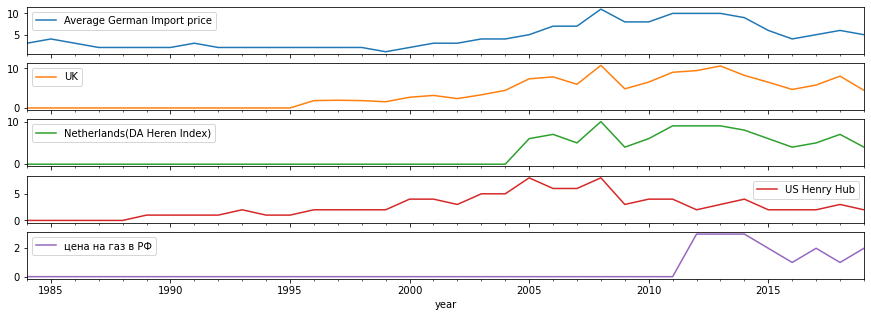

In [45]:
import matplotlib.pyplot as plt
Gas_basis.plot(x = 'year', subplots=True, figsize=(15,5))

<AxesSubplot:xlabel='Date'>

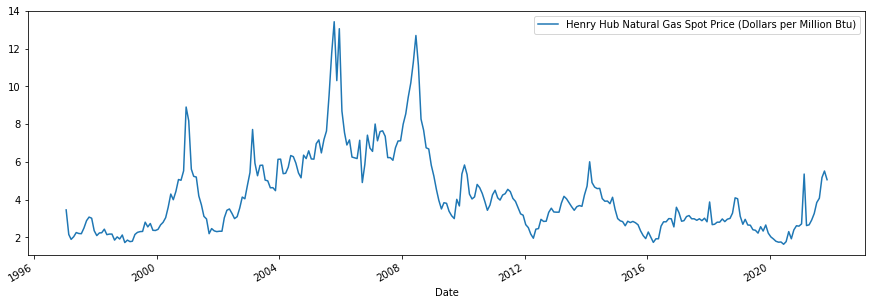

In [46]:
retro_gas.plot(x ='Date', figsize=(15,5))

В целях анализа взаимозависимости цен на природный газ ограничимся данными по газа на базисах Великобритании, США и Германии, так как цена в РФ нерыночная и неполные данные, а цены в Нидерландах повторяют динамику цен UK

In [47]:
Gas_basis_cut = Gas_basis.drop(Gas_basis.index[[0,1,2,3,4,5,6,7,8,9,10,11,12, 13]], axis=0) # не нашел как через слайсы, дата поехала
Gas_basis_cut.drop(['Netherlands(DA Heren Index)', 'цена на газ в РФ'], axis=1, inplace=True)
Gas_basis_cut.reset_index(drop=True)

,year,Average German Import price,UK,US Henry Hub
0,1998-01-01,2,1.864862,2
1,1999-01-01,1,1.579068,2
2,2000-01-01,2,2.710836,4
3,2001-01-01,3,3.174645,4
4,2002-01-01,3,2.372603,3
5,2003-01-01,4,3.331474,5
6,2004-01-01,4,4.457236,5
7,2005-01-01,5,7.383075,8
8,2006-01-01,7,7.872108,6
9,2007-01-01,7,6.006383,6


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

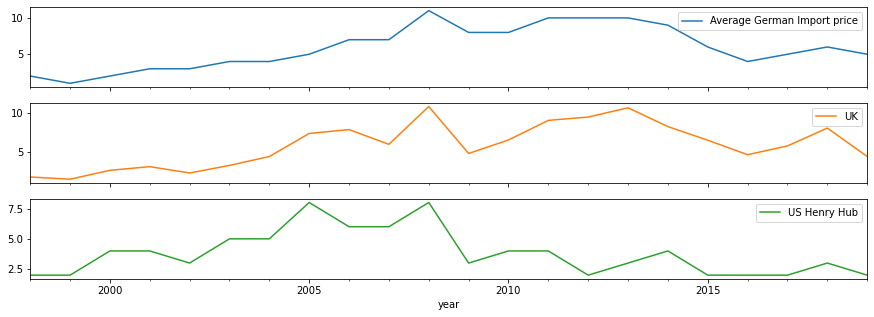

In [48]:
Gas_basis_cut.plot(x = 'year', subplots=True, figsize=(15,5))

## 1.1 Вычислим коэф корреляции между европейскими ценами (например UK) и ценами в США

In [49]:
correletion_german_us = Gas_basis_cut['Average German Import price'].corr(Gas_basis['US Henry Hub'])
print("correletion_german_us is:", correletion_german_us)

correletion_german_us is: 0.26542839571270516


In [50]:
correletion_uk_us = Gas_basis_cut['UK'].corr(Gas_basis['US Henry Hub'])
print("correletion_uk_us is:", correletion_uk_us)

correletion_uk_us is: 0.3384935839363916


In [51]:
correletion_uk_german = Gas_basis_cut['Average German Import price'].corr(Gas_basis['UK'])
print("correletion_uk_german is:", correletion_uk_german)

correletion_uk_german is: 0.9159028635037426


На основе данных мы видим что, корреляции с газовым рынком США очень низкая, но между собой стоимость газа на рынка Германии и Великобритании существенная

## 1.2 Смотрим корреляцию между ценами на метанол на разных базисах

In [52]:
Price_europa.head()

,Ед.изм.,евро/тыс.м3,евро/тонна
0,2015-01-01,207.585,354
1,2015-02-01,234.675,339
2,2015-03-01,229.110,339
3,2015-04-01,231.210,365
4,2015-05-01,215.775,365


array([<AxesSubplot:xlabel='Ед.изм.'>], dtype=object)

<Figure size 432x288 with 0 Axes>

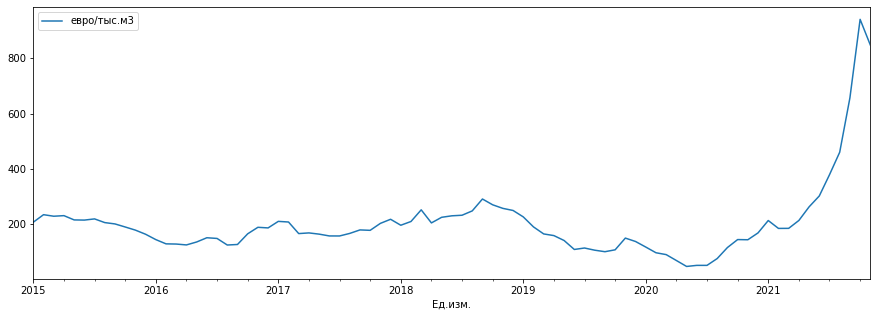

In [53]:
plt.figure()
Price_europa.plot(x = 'Ед.изм.', kind='line', y='евро/тыс.м3', subplots=True, figsize=(15,5
                                                                                       ))

array([<AxesSubplot:xlabel='Ед.изм.'>], dtype=object)

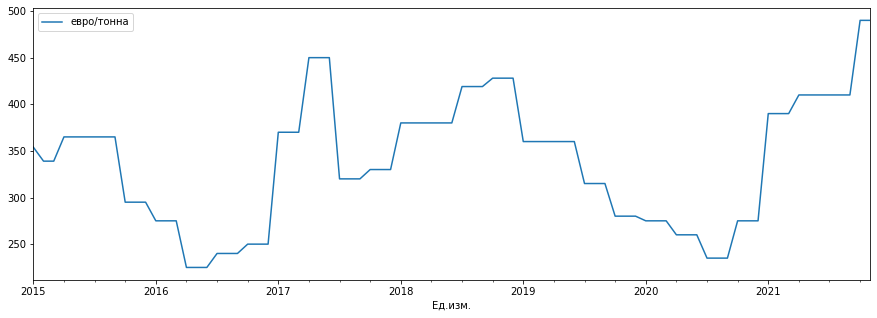

In [54]:
Price_europa.plot(x = 'Ед.изм.', kind='line', y='евро/тонна', subplots=True, figsize=(15,5))

In [55]:
correletion_euro = Price_europa['евро/тонна'].corr(Price_europa['евро/тыс.м3'])
print("correletion_uk_german is:", correletion_uk_german)

correletion_uk_german is: 0.9159028635037426


Очевидная корреляция цена на природный газ и сырье

In [56]:
Mx_Monthly

,Date,US $/MT,Europe €/MT,Asia $/MT,China $/MT
0,2001-01-01,0.000,0.0,0,0
1,2001-02-01,0.000,0.0,0,0
2,2001-03-01,0.000,0.0,0,0
3,2001-04-01,0.000,0.0,0,0
4,2001-05-01,256.102,0.0,0,0
...,...,...,...,...,...
255,2022-04-01,659.000,570.0,540,500
256,2022-05-01,639.000,570.0,520,470
257,2022-06-01,615.000,570.0,480,430
258,2022-07-01,605.000,555.0,450,410


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

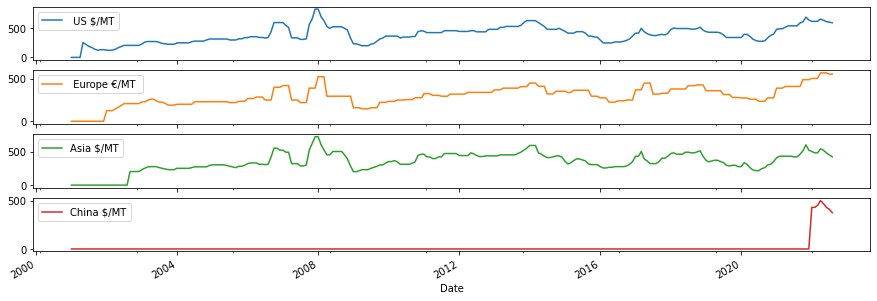

In [57]:
Mx_Monthly.plot(x = 'Date', subplots=True, figsize=(15,5))

Сделаем обрезание датафрейму с 9 января 2002 года (когда есть данные по всем трем графикам) и отбросим китайцев

In [58]:
Mx_Monthly_cut = Mx_Monthly.drop(Gas_basis.index[[0,1,2,3,4,5,6,7,8,9,10,11,12, 13,14,15,16,17,18,19,20,21]], axis=0) # не нашел как через слайсы, дата поехала
Mx_Monthly_cut.drop(['China $/MT'], axis=1, inplace=True)
Mx_Monthly_cut.reset_index(drop=True)

,Date,US $/MT,Europe €/MT,Asia $/MT
0,2002-11-01,206.212,208.0,202
1,2002-12-01,206.212,208.0,202
2,2003-01-01,229.494,228.0,230
3,2003-02-01,262.754,228.0,252
4,2003-03-01,272.732,245.0,270
...,...,...,...,...
233,2022-04-01,659.000,570.0,540
234,2022-05-01,639.000,570.0,520
235,2022-06-01,615.000,570.0,480
236,2022-07-01,605.000,555.0,450


In [61]:
#Mx_Monthly_cut = Mx_Monthly_cut.astype({"US $/MT": int, "Europe €/MT": int})

KeyError: 'Only a column name can be used for the key in a dtype mappings argument.'

In [62]:
#correletion_euro_us = Mx_Monthly_cut['US $/MT'].corr(Mx_Monthly_cut['Europe €/MT'])
#print("correletion_euro_us is:", correletion_euro_us)

KeyError: 'US $/MT'

In [63]:
#correletion_euro_us = Mx_Monthly_cut['Asia $/MT'].corr(Mx_Monthly_cut['Europe €/MT'])
#print("correletion_euro_us is:", correletion_euro_us)

KeyError: 'Europe €/MT'

Не нашел, что от меня он хочет по итогу

## Построим простой прогноз газа по профету и сравним это с прогнозом Агентства США

In [80]:
retro_gas

,ds,y
0,1997-01-15,3.45
1,1997-02-15,2.15
2,1997-03-15,1.89
3,1997-04-15,2.03
4,1997-05-15,2.25
...,...,...
294,2021-07-15,3.84
295,2021-08-15,4.07
296,2021-09-15,5.16
297,2021-10-15,5.51


In [65]:
retro_gas.columns = ['ds', 'y']

In [66]:
retro_gas.ds = pd.to_datetime(retro_gas.ds)
retro_gas.tail()

,ds,y
294,2021-07-15,3.84
295,2021-08-15,4.07
296,2021-09-15,5.16
297,2021-10-15,5.51
298,2021-11-15,5.05


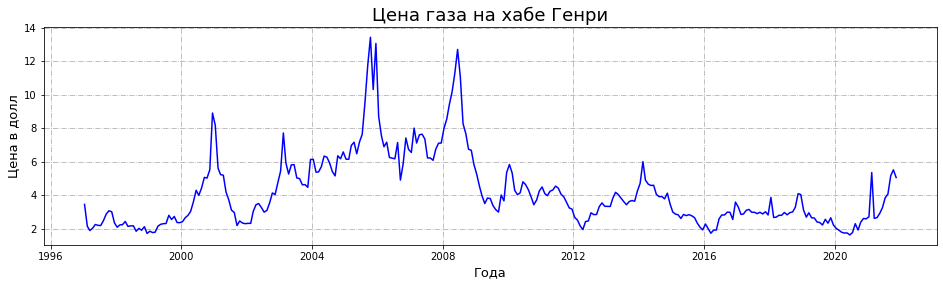

In [67]:
plt.figure(figsize=(16,4))
plt.grid(linestyle='-.')

plt.plot(retro_gas.ds, retro_gas.y, 'b')

plt.title('Цена газа на хабе Генри', fontsize=18)
plt.ylabel('Цена в долл', fontsize = 13)
plt.xlabel('Года', fontsize = 13)
plt.show()

In [68]:
import warnings
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [69]:
model = Prophet(changepoint_prior_scale=0.15, daily_seasonality=False)

In [70]:
model.fit(retro_gas)

16:41:45 - cmdstanpy - INFO - Chain [1] start processing
16:41:46 - cmdstanpy - INFO - Chain [1] done processing


прогноз до 2030 года на 9 лет

In [71]:
future = model.make_future_dataframe(periods=365*9, freq='D')
predict = model.predict(future)

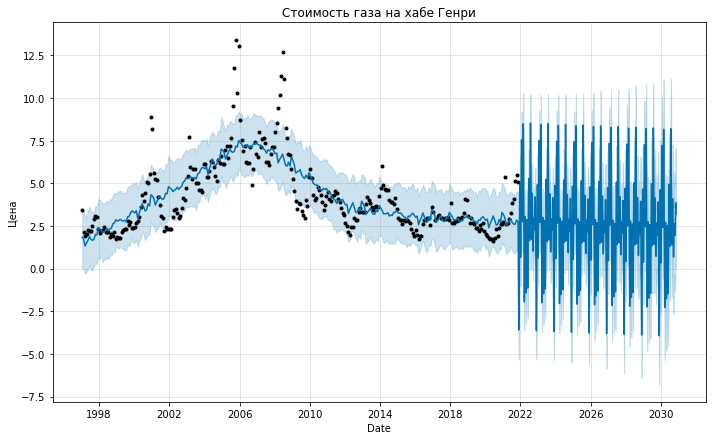

In [72]:
model.plot(predict, xlabel='Date', ylabel='Цена')
plt.title('Стоимость газа на хабе Генри')
plt.show()

16:41:52 - cmdstanpy - INFO - Chain [1] start processing
16:41:52 - cmdstanpy - INFO - Chain [1] done processing


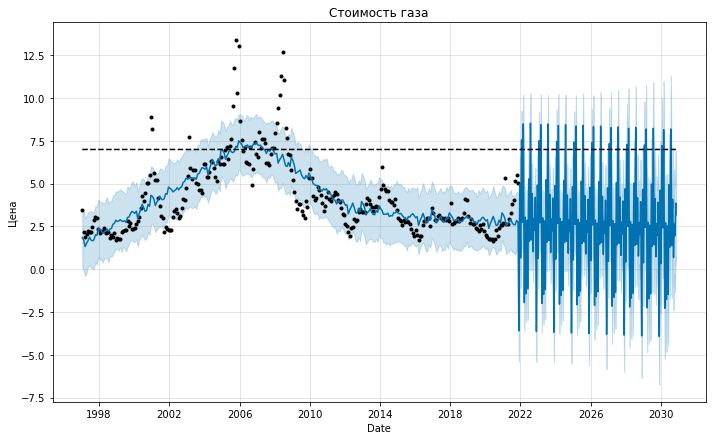

In [73]:
model_2 = Prophet(growth='logistic', changepoint_prior_scale=0.15, daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False)
cap = 7 #максимум для цены
floor = 0 #минимум для цены
wmt_2 = retro_gas.copy()
wmt_2['cap'] = cap
wmt_2['floor'] = floor
model_2.fit(wmt_2)
future_2 = model.make_future_dataframe(periods=365*9, freq='D')
future_2['cap'] = cap
future_2['floor'] = floor
predict_2 = model.predict(future_2)
model.plot(predict_2, xlabel='Date', ylabel='Цена')
plt.title('Стоимость газа')
plt.show()

<AxesSubplot:xlabel='year'>

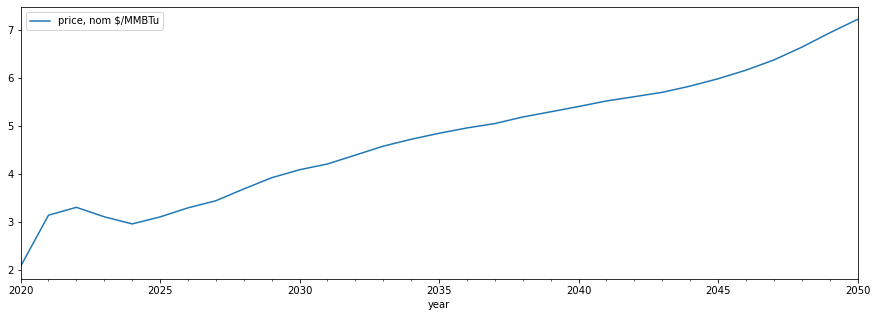

In [74]:
forecast.plot(x ='year', figsize=(15,5))

прогноз Агентства США к 30 году прогнозирует рост до 4 баксов

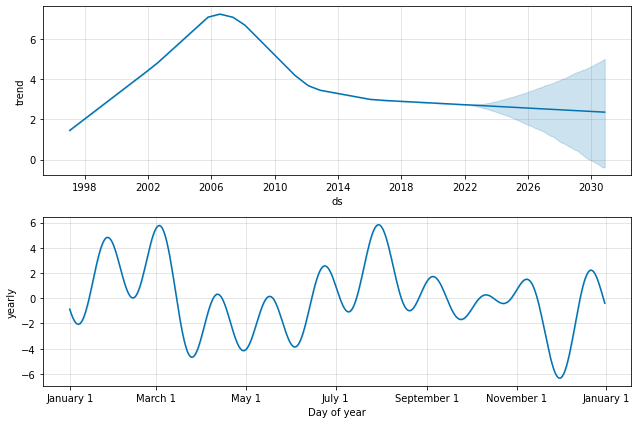

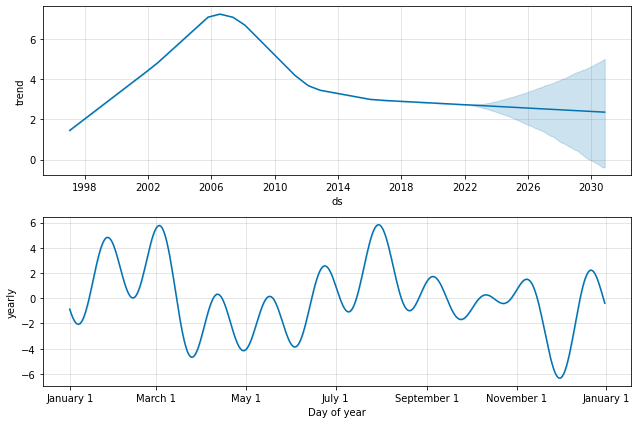

In [75]:
model.plot_components(predict)

In [76]:
future_pred = predict.loc[predict.ds> '2021-11-15']
future_pred = future_pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
future_pred.sort_values
future_pred.sample(5)

,ds,yhat,yhat_lower,yhat_upper
2150,2026-12-11,0.369915,-1.739266,2.343051
1117,2024-02-12,2.783578,1.082270,4.542560
858,2023-05-29,-0.174810,-1.795522,1.405306
1414,2024-12-05,-2.646548,-4.472784,-1.020517
855,2023-05-26,0.884348,-0.854701,2.569837


Проверяем точность прогноза на 10 лет

In [77]:
wmt_cv = cross_validation(model, initial='3650', period='180 days', horizon='365 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/49 [00:00<?, ?it/s]

16:42:07 - cmdstanpy - INFO - Chain [1] start processing
16:42:07 - cmdstanpy - INFO - Chain [1] done processing
16:42:08 - cmdstanpy - INFO - Chain [1] start processing
16:42:17 - cmdstanpy - INFO - Chain [1] done processing
16:42:18 - cmdstanpy - INFO - Chain [1] start processing
16:42:28 - cmdstanpy - INFO - Chain [1] done processing
16:42:29 - cmdstanpy - INFO - Chain [1] start processing
16:42:41 - cmdstanpy - INFO - Chain [1] done processing
16:42:42 - cmdstanpy - INFO - Chain [1] start processing
16:42:43 - cmdstanpy - INFO - Chain [1] done processing
16:42:44 - cmdstanpy - INFO - Chain [1] start processing
16:42:44 - cmdstanpy - INFO - Chain [1] done processing
16:42:46 - cmdstanpy - INFO - Chain [1] start processing
16:42:46 - cmdstanpy - INFO - Chain [1] done processing
16:42:48 - cmdstanpy - INFO - Chain [1] start processing
16:42:48 - cmdstanpy - INFO - Chain [1] done processing
16:42:49 - cmdstanpy - INFO - Chain [1] start processing
16:42:50 - cmdstanpy - INFO - Chain [1]

In [78]:
wmt_pm = performance_metrics(wmt_cv)
wmt_pm.tail(3)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
281,363 days,61.703528,7.855159,3.398864,1.255218,0.416994,0.532312,0.517241
282,364 days,61.088715,7.815927,3.321553,1.233850,0.375758,0.522636,0.534483
283,365 days,60.944955,7.806725,3.319702,1.223286,0.416994,0.522622,0.528736


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


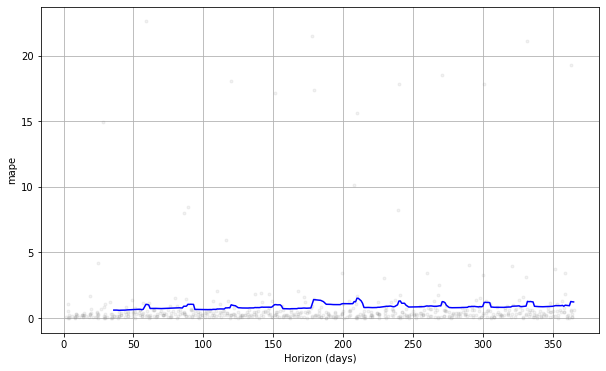

In [79]:
fig = plot_cross_validation_metric(wmt_cv, metric='mape')

Высокая ошибка прогноза, модель предсказывает херово(

Пробуем бустинг

In [103]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
import lightgbm as lgb

In [84]:
retro_gas.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [93]:
retro_train = retro_gas.loc[retro_gas.index <= 2014-12-15].copy()
retro_test = retro_gas.loc[retro_gas.index > 2014-12-15].copy()

Попробуем создать признаки в зависимости от даты

In [99]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['ds'] = df.index
    df['dayofweek'] = df['ds'].dt.dayofweek
    df['quarter'] = df['ds'].dt.quarter
    df['month'] = df['ds'].dt.month
    df['year'] = df['ds'].dt.year
    df['dayofyear'] = df['ds'].dt.dayofyear
    df['dayofmonth'] = df['ds'].dt.day
    df['weekofyear'] = df['ds'].dt.weekofyear

    X = df[['dayofweek','quarter','month','year',
            'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [102]:
#X_train, y_train = create_features(retro_train, label='y')
#X_test, y_test = create_features(retro_test, label='y')

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
#reg = xgb.XGBRegressor(n_estimators=1000)
#reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        verbose=False)

In [ ]:
_ = plot_importance(reg, height=0.9)

In [ ]:
retro_train['Price_Prediction'] = reg.predict(X_test)
retro_all = pd.concat([retro_test, retro_train], sort=False)

In [ ]:
_ = retro_all[['y','Price_Prediction']].plot(figsize=(15, 5))

In [ ]:
mean_squared_error(y_true=retro_test['y'], y_pred=retro_test['Price_Prediction'])